Introduction
This notebook demonstrates a comprehensive approach to predicting stock prices using a combination of financial data, sentiment analysis, and machine learning models. The model leverages a Long Short-Term Memory (LSTM) network, a specialized type of recurrent neural network (RNN) designed to capture long-term dependencies in sequential data, making it well-suited for time series forecasting.

Objectives:
Data Preprocessing: Load and clean historical stock price data, along with sentiment scores and key economic indicators.
Feature Engineering: Select and scale relevant features to optimize model performance.
Modeling: Build and train an LSTM model to predict future stock prices based on past trends.
Evaluation: Assess model accuracy using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE).
Visualization: Compare actual vs. predicted stock prices using plots for better insights.
This analysis provides valuable insights into stock price movement, helping investors and analysts make informed decisions.

Step 1: Import Libraries
We start by importing the necessary libraries for data processing, model building, and visualization.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import os


Step 2: Load and Prepare Data
In this step, we load the dataset and set the date column as the index for easier time-series analysis.

In [10]:
data = pd.read_csv("aapl_combined_dataset3.csv", parse_dates=['Date'])
data.set_index('Date', inplace=True)

In this step, we calculate the correlation matrix to identify relationships between features and visualize it using a heatmap.

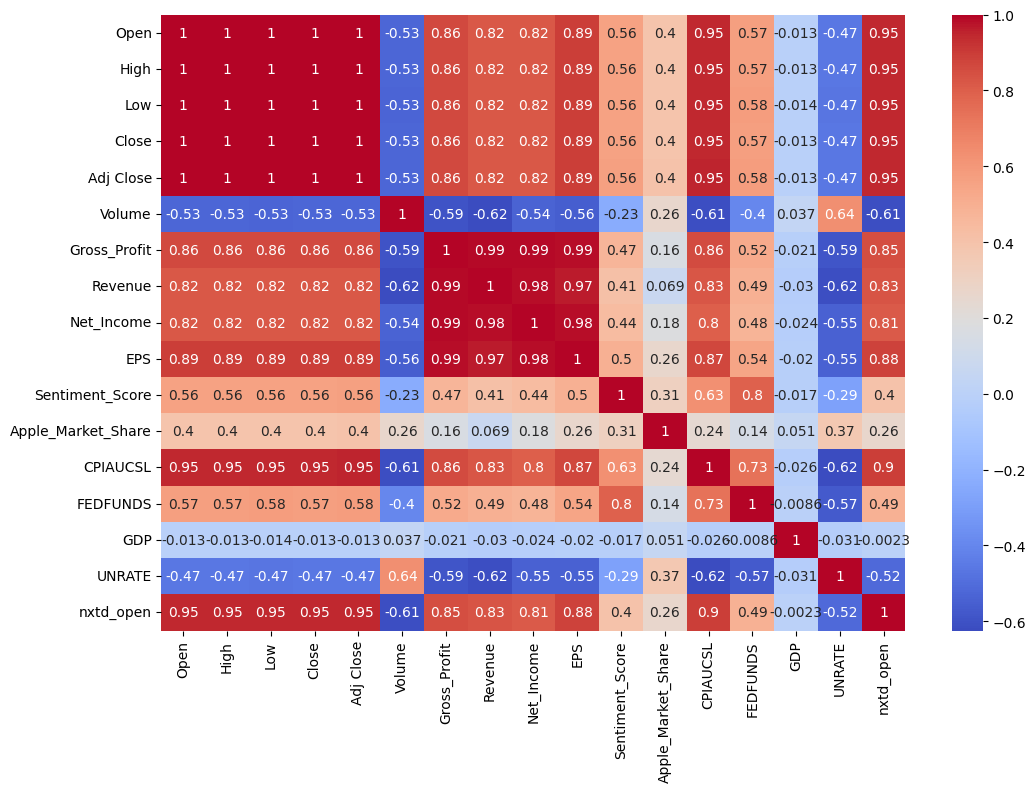

<Figure size 640x480 with 0 Axes>

In [11]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
plt.savefig('correlation_matrix.png')

High Correlation Within Stock Prices: Features like Open, Close, High, Low, and Adj Close show almost perfect correlation.
Volume and Stock Price: A moderate negative correlation suggests the impact of trading volume on price movement.
Economic Factors and Stock Prices: Economic indicators (e.g., CPI, Fed Funds, Unemployment Rate) show moderate relationships with stock prices.
Redundant Features: Features like nxdt_open are highly correlated with Open, indicating possible redundancy in predictive modeling.

This step helps in selecting the most relevant features for predicting the stock price.

Selected Features based on correlation: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'nxtd_open', 'CPIAUCSL',
       'EPS', 'Gross_Profit', 'Net_Income', 'Revenue', 'FEDFUNDS',
       'Sentiment_Score', 'Volume', 'UNRATE', 'Apple_Market_Share'],
      dtype='object')
Mean Squared Error: 0.03408143846641415
               Feature    Importance
0                 Open  3.811700e-01
2                  Low  2.775304e-01
1                 High  2.216990e-01
4            Adj Close  6.454983e-02
3                Close  5.027400e-02
6             CPIAUCSL  4.730487e-03
14              UNRATE  3.998747e-05
5            nxtd_open  2.619083e-06
13              Volume  1.028773e-06
7                  EPS  8.387419e-07
11            FEDFUNDS  5.612947e-07
15  Apple_Market_Share  3.782382e-07
10             Revenue  3.250680e-07
9           Net_Income  1.915851e-07
12     Sentiment_Score  1.658782e-07
8         Gross_Profit  1.593859e-07


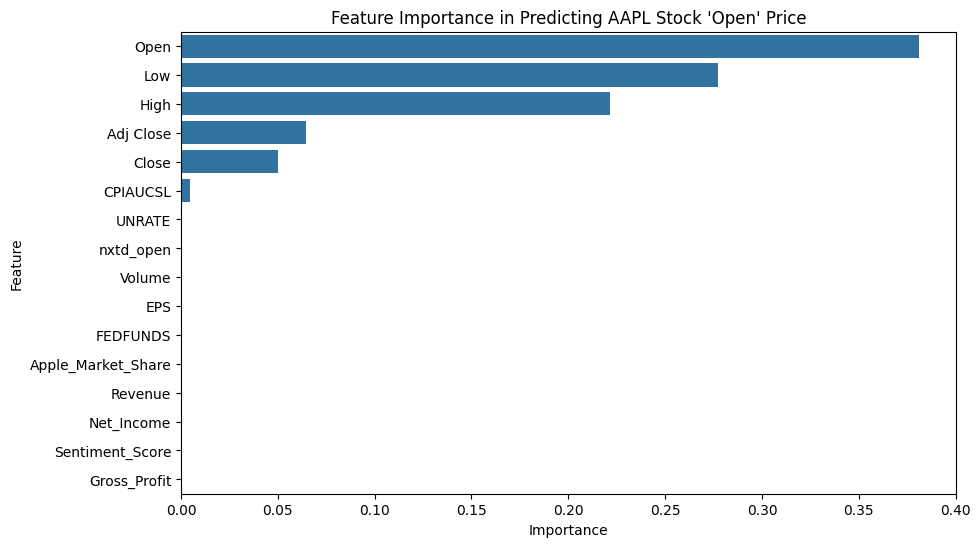

In [12]:
# Adjust correlation threshold
corr_target = corr_matrix['Open'].abs().sort_values(ascending=False)
selected_features = corr_target[corr_target > 0.1].index  # Lowered threshold to 0.1

# If no features pass the threshold, include a default set for testing
if len(selected_features) <= 1:  # Only 'Close' in selected
    selected_features = data.columns.difference(['Open'])  # Default to all other columns

print("Selected Features based on correlation:", selected_features)

# Step 3: Prepare Data for Model Training
X = data[selected_features]
y = data['Open']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest Regression Model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict and Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature Importance Analysis
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance in Predicting AAPL Stock 'Open' Price")
plt.savefig('feature_importance.png')  # Save feature importance plot
